# Basic KMeans with numpy only

In [40]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
def euclidian_distances(a,b):
    return np.sqrt( np.sum((a-b)**2, axis=1) )

In [42]:
a = np.array([[3,3],[2,12],[5,6]])
b = np.array([[2,2],[4,5],[3,3]])
euclidian_distances(a,b)

array([1.41421356, 7.28010989, 3.60555128])

### Generate synthetic data

In [43]:
dims = 2 # nuber of dimensions in space
num_of_data = 40 # number of data points per flock

x1 = 3.2 * np.random.rand(num_of_data,dims) + np.random.randint(5,7)
x2 = 3.2 * np.random.rand(num_of_data,dims) + np.random.randint(1,5)
x3 = 3.2 * np.random.rand(num_of_data,dims)
x3[:,0] = x3[:,0] + np.random.randint(3,9)
x4 = x3 + np.random.randint(0,7)
x = np.concatenate((x1,x2,x3,x4),axis=0)

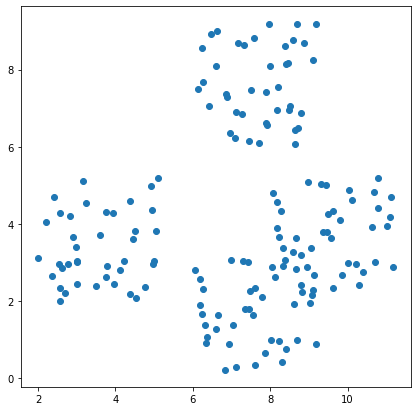

In [44]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(x[:,0],x[:,1])

### KMeans algorithm

In [47]:
K = 4 # number of kernels (hyper-parameter)

kernel_locs_prev = np.mean(x,axis=0) + (np.random.rand(K,dims)-0.5)*5
dists = np.zeros((x.shape[0],K))
# loop over the max number of iterations
for i in range(20): 
    # loop over each of the kernels and determine the distances to data
    for k in range(K): 
        dists[:,k] = euclidian_distances(kernel_locs_prev[k,:],x)
    # determine which is the nearest kernel
    k_class = np.argmin(dists, axis=1)
    kernel_locs = np.zeros_like(kernel_locs_prev)
    # determine new locations of kernels
    for k in range(K):
        kernel_locs[k,:] = np.mean(x[k_class == k],axis=0)
    if np.sum(np.isnan(kernel_locs)) != 0:
        break
    # break if locations of kernels is similar to previous iteration
    if np.array_equal(kernel_locs,kernel_locs_prev):
        print('Num of iterations needed: %i' %i)
        break
    kernel_locs_prev = kernel_locs.copy()

Num of iterations needed: 9


### Plot classification results

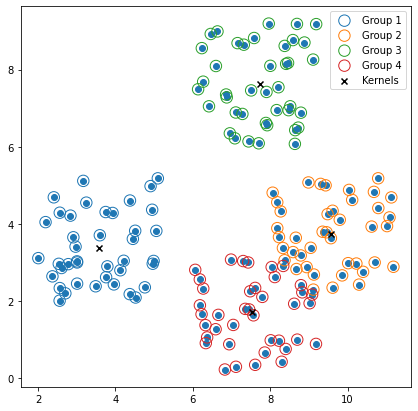

In [48]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(x[:,0],x[:,1])
for k in range(K):
    i=k+1
    temp_str = str('Group %i' %i)
    ax.scatter(x[k_class == k][:,0],
               x[k_class == k][:,1], 
               s=130, 
               edgecolor='C'+str(k), 
               facecolors='none', 
               label=temp_str)
ax.scatter(kernel_locs[:,0],
           kernel_locs[:,1], 
           c='k', 
           marker='x', 
           label='Kernels')
ax.legend()